In [176]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# for upset plots
from itertools import combinations, chain
from upsetplot import from_memberships
from math import comb
import upsetplot


# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:

# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_3_sc/python_out/'

#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

# Data Processing

In [3]:
# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]




# Node degree distribution

In [127]:
# all cells
mm_idx = metadata[metadata["species"]=="MMus"].index.values
st_idx = metadata[metadata["species"]=="STeg"].index.values

mm_all = pd.concat(np.take(omc_type, mm_idx))
st_all = pd.concat(np.take(omc_type, st_idx))
mm_meta = {"mice":["ALL"], "species":["MMus"], "dataset":["ALL"]}
st_meta = {"mice":["ALL"], "species":["STeg"], "dataset":["ALL"]}

mm_nodes = dfs_to_node_proportions([mm_all], meta=mm_meta)
st_nodes = dfs_to_node_proportions([st_all], meta=st_meta)

all_nodes = pd.concat([mm_nodes, st_nodes])
all_nodes

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


,node_degree,proportion,count,percentage,mice,species,dataset
1.0,1.0,0.248373,17782,24.837277,ALL,MMus,ALL
2.0,2.0,0.607984,43528,60.798391,ALL,MMus,ALL
3.0,3.0,0.051652,3698,5.165237,ALL,MMus,ALL
4.0,4.0,0.029723,2128,2.972316,ALL,MMus,ALL
5.0,5.0,0.026874,1924,2.687376,ALL,MMus,ALL
6.0,6.0,0.020993,1503,2.099338,ALL,MMus,ALL
7.0,7.0,0.012096,866,1.209599,ALL,MMus,ALL
8.0,8.0,0.002207,158,0.220689,ALL,MMus,ALL
9.0,9.0,0.000084,6,0.008381,ALL,MMus,ALL
10.0,10.0,0.000014,1,0.001397,ALL,MMus,ALL


## pie charts

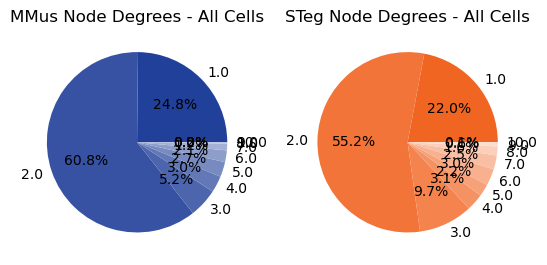

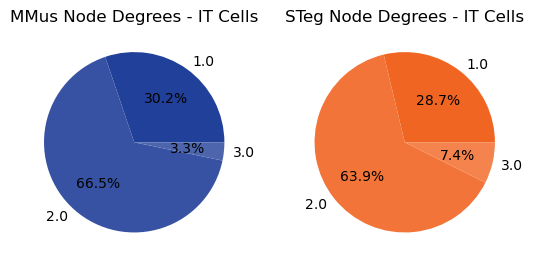

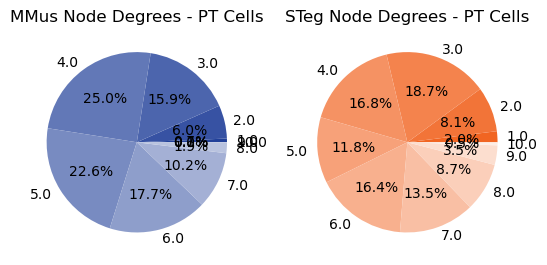

In [141]:
blue_qual = []
orange_qual = []
for i in range(10):
    blue_qual.append(blue_cmp.colors[255-i*25])
    orange_qual.append(orange_cmp.colors[255-i*25])

fig, axs = plt.subplots(1,2)
# mm pie chart
axs[0].pie(mm_nodes['proportion'], labels=mm_nodes['node_degree'], colors=blue_qual, autopct='%1.1f%%')
axs[0].set_title("MMus Node Degrees - All Cells")

# mm pie chart
axs[1].pie(st_nodes['proportion'], labels=st_nodes['node_degree'], colors=orange_qual, autopct='%1.1f%%')
axs[1].set_title("STeg Node Degrees - All Cells")
plt.show()



# IT cells
mm_it = mm_all[mm_all['type']=="IT"]
st_it = st_all[st_all['type']=="IT"]

mm_nodes = dfs_to_node_proportions([mm_it], meta=mm_meta)
st_nodes = dfs_to_node_proportions([st_it], meta=st_meta)

fig, axs = plt.subplots(1,2)
# mm pie chart
axs[0].pie(mm_nodes['proportion'], labels=mm_nodes['node_degree'], colors=blue_qual, autopct='%1.1f%%')
axs[0].set_title("MMus Node Degrees - IT Cells")

# mm pie chart
axs[1].pie(st_nodes['proportion'], labels=st_nodes['node_degree'], colors=orange_qual, autopct='%1.1f%%')
axs[1].set_title("STeg Node Degrees - IT Cells")
plt.show()



# PT cells
mm_pt = mm_all[mm_all['type']=="PT"]
st_pt = st_all[st_all['type']=="PT"]

mm_nodes = dfs_to_node_proportions([mm_pt], meta=mm_meta)
st_nodes = dfs_to_node_proportions([st_pt], meta=st_meta)
fig, axs = plt.subplots(1,2)
# mm pie chart
axs[0].pie(mm_nodes['proportion'], labels=mm_nodes['node_degree'], colors=blue_qual, autopct='%1.1f%%')
axs[0].set_title("MMus Node Degrees - PT Cells")

# mm pie chart
axs[1].pie(st_nodes['proportion'], labels=st_nodes['node_degree'], colors=orange_qual, autopct='%1.1f%%')
axs[1].set_title("STeg Node Degrees - PT Cells")
plt.show()

mm_nodes = dfs_to_node_proportions([mm_all], meta=mm_meta)
st_nodes = dfs_to_node_proportions([st_all], meta=st_meta)


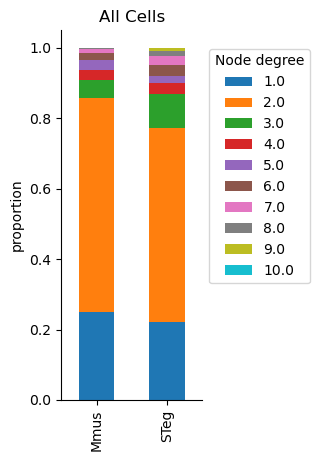

In [123]:

proportion_node_stacked_bars(all_nodes, title="All Cells")



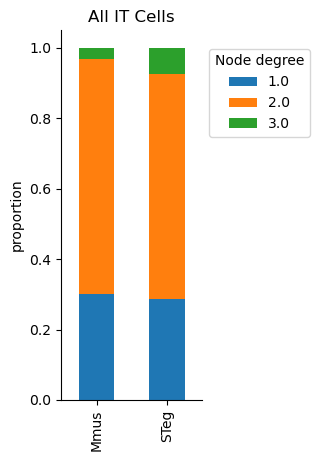

In [24]:
# IT cells
mm_it = mm_all[mm_all['type']=="IT"]
st_it = st_all[st_all['type']=="IT"]

mm_nodes = dfs_to_node_proportions([mm_it], meta=mm_meta)
st_nodes = dfs_to_node_proportions([st_it], meta=st_meta)

all_nodes = pd.concat([mm_nodes, st_nodes])

proportion_node_stacked_bars(all_nodes, title="All IT Cells")



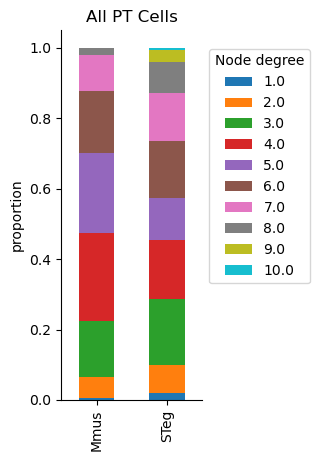

In [25]:
# PT cells
mm_pt = mm_all[mm_all['type']=="PT"]
st_pt = st_all[st_all['type']=="PT"]

mm_nodes = dfs_to_node_proportions([mm_pt], meta=mm_meta)
st_nodes = dfs_to_node_proportions([st_pt], meta=st_meta)

all_nodes = pd.concat([mm_nodes, st_nodes])

proportion_node_stacked_bars(all_nodes, title="All PT Cells")



# P(A|B)

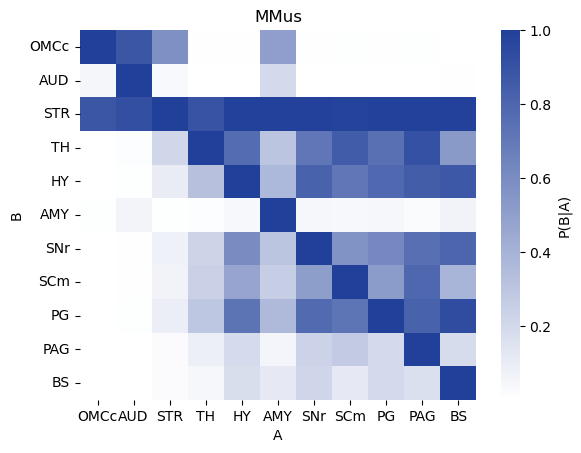

In [99]:
mm_pab, areas = calc_PAB(mm_all)
pab_heatmap(mm_pab, areas, title="MMus", cmap=blue_cmp)
plt.show()

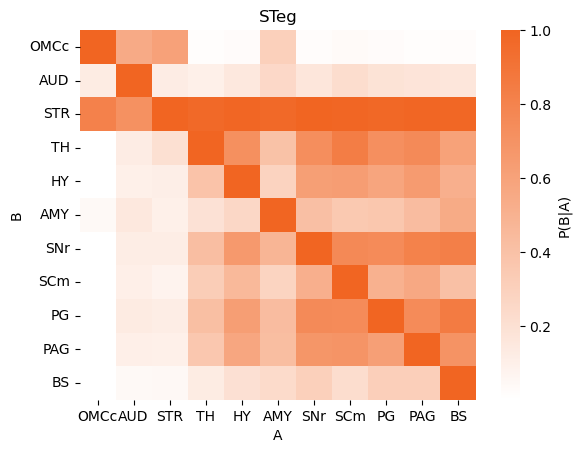

In [100]:
st_pab, areas = calc_PAB(st_all)
pab_heatmap(st_pab, areas, title="STeg", cmap=orange_cmp)
plt.show()

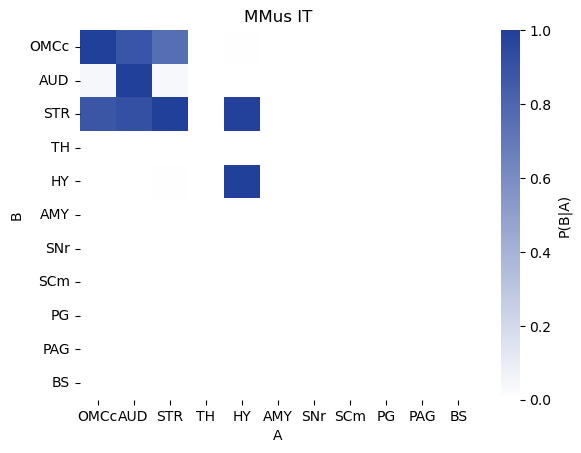

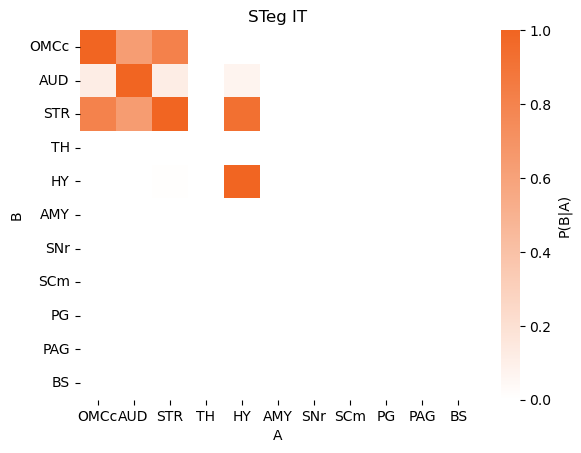

In [102]:
# IT

mm_it = mm_all[mm_all['type']=="IT"]
mm_pab, areas = calc_PAB(mm_it)
pab_heatmap(mm_pab, areas, title="MMus IT", cmap=blue_cmp)
plt.show()

st_it = st_all[st_all['type']=="IT"]
st_pab, areas = calc_PAB(st_it)
pab_heatmap(st_pab, areas, title="STeg IT", cmap=orange_cmp)
plt.show()

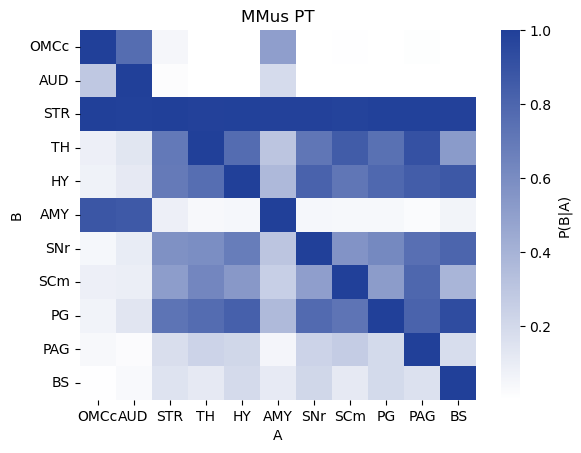

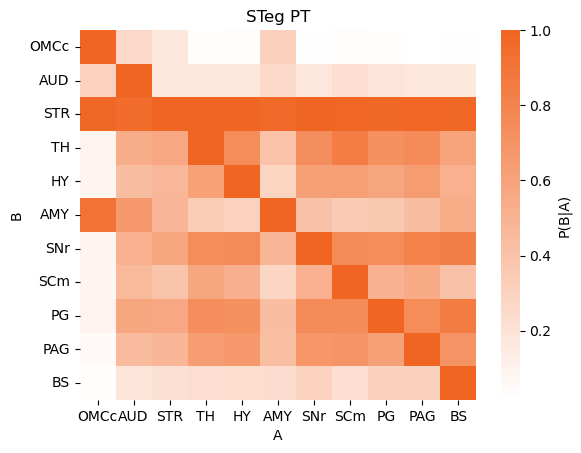

In [103]:
# PT
mm_pab, areas = calc_PAB(mm_pt)
pab_heatmap(mm_pab, areas, title="MMus PT", cmap=blue_cmp)
plt.show()

st_pab, areas = calc_PAB(st_pt)
pab_heatmap(st_pab, areas, title="STeg PT", cmap=orange_cmp)
plt.show()

# motif analysis

## IT cells

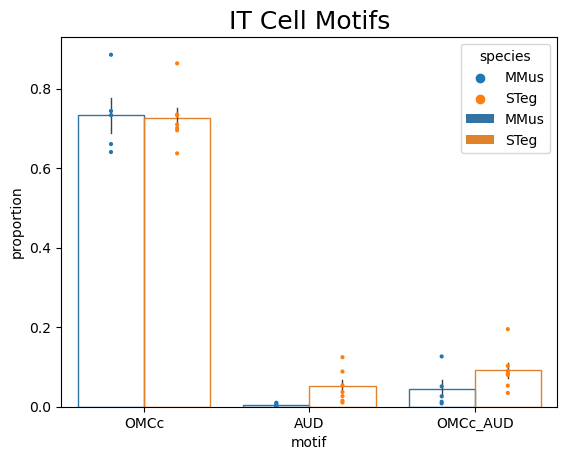

In [78]:
# IT motifs
# OMCc, AUD, OMCc + AUD
# disregard STR projections

df_list = [df[df["type"]=="IT"] for df in omc_type]
plot_df = pd.DataFrame(columns=["motif", "proportion", "count", "total", "mice", "species", "dataset"])

for i in range(len(df_list)):
    df = df_list[i]
    omcc = ((df['OMCc']==1) & (df['AUD']==0)).sum()
    aud = ((df['OMCc']==0) & (df['AUD']==1)).sum()
    omcc_aud = ((df['OMCc']==1) & (df['AUD']==1)).sum()
    total = df.shape[0]
    int_df = pd.DataFrame({'motif':["OMCc", "AUD", "OMCc_AUD"], 'proportion':[omcc/total, aud/total, omcc_aud/total],
                      'count':[omcc,aud,omcc_aud], 'total':total, 'mice':mice[i], 
                      'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])


# dot bar plot
dot_bar_plot(plot_df, title="IT Cell Motifs", xaxis="motif", yaxis="proportion", hueaxis="species")
plt.show()


In [ ]:
# upset plot


## PT/PAG motifs

In [17]:
# Total number of PAG neurons per animal
# pd.set_option("display.max_rows", 10)
omc_pt = [df[df['type']=="PT"].drop("type",axis=1) for df in omc_type]
omc_pag = [df[df['PAG']==1] for df in omc_pt]

print("Number of neurons per animal")
print("mouse", "\t", "PAG", "\t", "PT")
# print("-------------------------------")
for i in range(num_samples):
    print(mice[i]+":", "\t", omc_pag[i].shape[0], "\t", omc_pt[i].shape[0])

Number of neurons per animal
mouse 	 PAG 	 PT
MMM1: 	 25 	 1145
MMF2: 	 209 	 2073
MMF3: 	 108 	 1227
STM1: 	 21 	 81
STM2: 	 13 	 33
STF3: 	 15 	 50
MMM4: 	 53 	 1153
MMF5: 	 1095 	 2893
STF4: 	 70 	 211
STM5: 	 79 	 116
STF6: 	 89 	 210
STM7: 	 145 	 215


OMCi                                                432.0
OMCc                                                  7.0
AUD                                                  76.0
STR                                                 428.0
TH                                                  326.0
HY                                                  280.0
AMY                                                 187.0
SNr                                                 351.0
SCm                                                 242.0
PG                                                  323.0
PAG                                                 432.0
BS                                                  134.0
type    PTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPT...
dtype: object


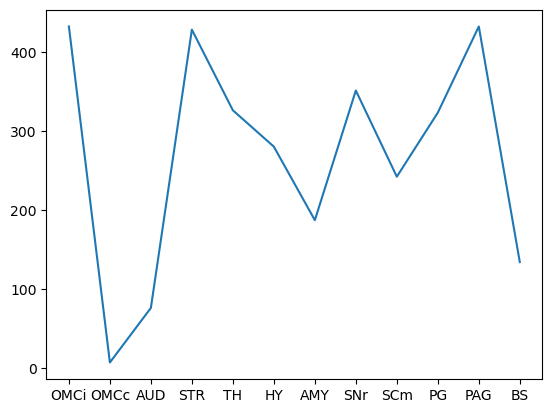

In [26]:
st_pag = st_pt[st_pt['PAG']==1]
print(st_pag.sum())
plt.plot(st_pag.sum()[:-1])


OMCi                                               1490.0
OMCc                                                 16.0
AUD                                                   4.0
STR                                                1483.0
TH                                                 1354.0
HY                                                 1258.0
AMY                                                  39.0
SNr                                                1122.0
SCm                                                1185.0
PG                                                 1217.0
PAG                                                1490.0
BS                                                  241.0
type    PTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPT...
dtype: object


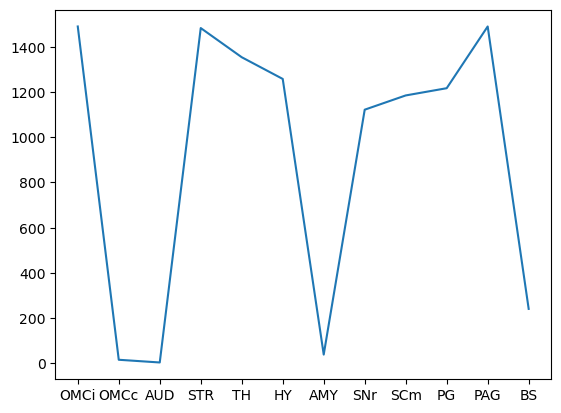

In [27]:
mm_pag = mm_pt[mm_pt['PAG']==1]
print(mm_pag.sum())
plt.plot(mm_pag.sum()[:-1])

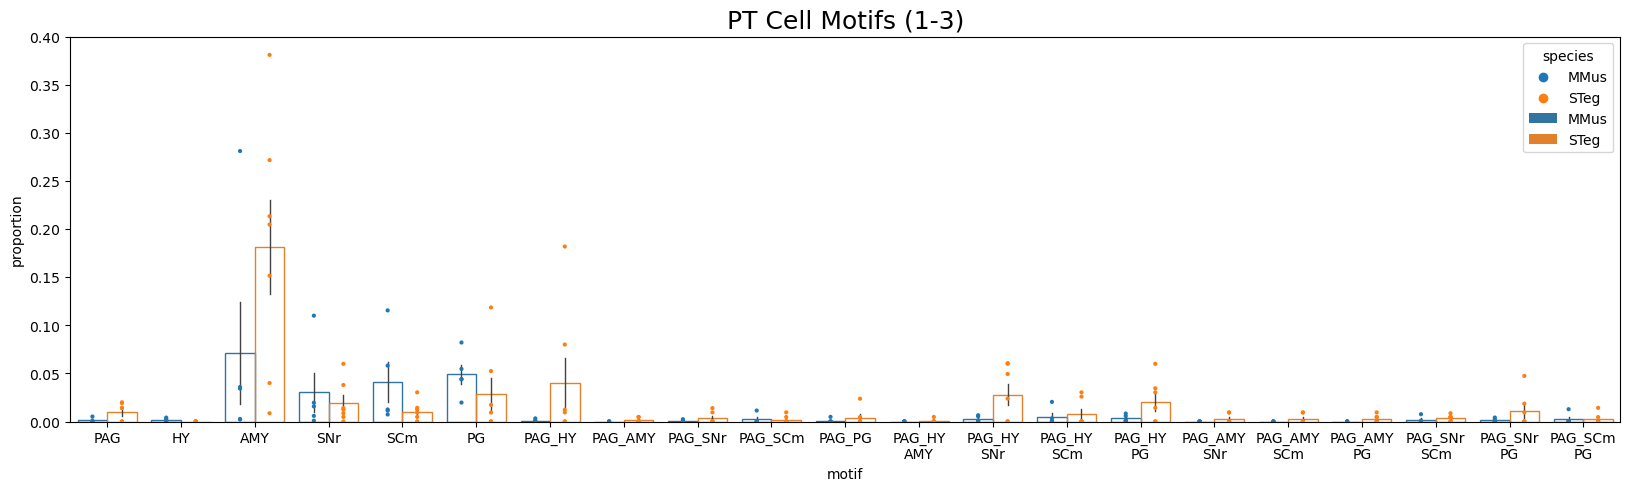

In [119]:
df_list = [df[df["type"]=="PT"] for df in omc_type]
df_list = [df.drop(['OMCi', 'OMCc', 'AUD', 'STR', 'TH', 'BS', 'type'], axis=1) for df in df_list]
plot_df = pd.DataFrame(columns=["motif", "proportion", "count", "total", "mice", "species", "dataset"])


for i in range(len(df_list)):
    df = df_list[i]
    total = df.shape[0]

    # degree 1
    idx1 = df.sum(axis=1) == 1
    df_1 = df[idx1]
    pag = (df_1["PAG"]==1).sum()
    hy = (df_1["HY"]==1).sum()
    amy = (df_1["AMY"]==1).sum()
    snr = (df_1["SNr"]==1).sum()
    scm = (df_1["SCm"]==1).sum()
    pg = (df_1["PG"]==1).sum()
    int_df = pd.DataFrame({'motif':["PAG", "HY","AMY", "SNr", "SCm", "PG"], 
                           'proportion':[pag/total, hy/total, amy/total, snr/total, scm/total, pg/total],
                      'count':[pag,hy,amy,snr,scm,pg], 'total':total, 'mice':mice[i], 
                      'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])

    # degree 2
    idx2 = df.sum(axis=1) == 2
    df_2 = df[idx2]
    pag_hy = ((df_2["PAG"]==1) & df_2["HY"]==1).sum()
    pag_amy = ((df_2["PAG"]==1) & df_2["AMY"]==1).sum()
    pag_snr = ((df_2["PAG"]==1) & df_2["SNr"]==1).sum()
    pag_scm = ((df_2["PAG"]==1) & df_2["SCm"]==1).sum()
    pag_pg = ((df_2["PAG"]==1) & df_2["PG"]==1).sum()
    int_df = pd.DataFrame({'motif':["PAG_HY", "PAG_AMY", "PAG_SNr", "PAG_SCm", "PAG_PG"], 
                           'proportion':[pag_hy/total, pag_amy/total,pag_snr/total, pag_scm/total, pag_pg/total],
                      'count':[pag_hy, pag_amy, pag_snr, pag_scm, pag_pg], 'total':total, 'mice':mice[i], 
                      'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])

    # degree 3
    idx3 = df.sum(axis=1) == 3
    df_3 = df[idx3]
    pag_hy_amy = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["AMY"]==1)).sum()
    pag_hy_snr = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["SNr"]==1)).sum()
    pag_hy_scm = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["SCm"]==1)).sum()
    pag_hy_pg = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["PG"]==1)).sum()
    pag_amy_snr = ((df_3["PAG"]==1) & (df_3["AMY"]==1) & (df_3["SNr"]==1)).sum()
    pag_amy_scm = ((df_3["PAG"]==1) & (df_3["AMY"]==1) & (df_3["SCm"]==1)).sum()
    pag_amy_pg = ((df_3["PAG"]==1) & (df_3["AMY"]==1) & (df_3["PG"]==1)).sum()
    pag_snr_scm = ((df_3["PAG"]==1) & (df_3["SNr"]==1) & (df_3["SCm"]==1)).sum()
    pag_snr_pg = ((df_3["PAG"]==1) & (df_3["SNr"]==1) & (df_3["PG"]==1)).sum()
    pag_scm_pg = ((df_3["PAG"]==1) & (df_3["SCm"]==1) & (df_3["PG"]==1)).sum()
    int_df = pd.DataFrame({'motif':["PAG_HY\nAMY", "PAG_HY\nSNr", "PAG_HY\nSCm", "PAG_HY\nPG",
                                    "PAG_AMY\nSNr", "PAG_AMY\nSCm", "PAG_AMY\nPG", 
                                    "PAG_SNr\nSCm", "PAG_SNr\nPG", "PAG_SCm\nPG"], 
                           'proportion':[pag_hy_amy/total, pag_hy_snr/total, pag_hy_scm/total, pag_hy_pg/total, 
                                         pag_amy_snr/total, pag_amy_snr/total, pag_amy_pg/total, 
                                         pag_snr_scm/total, pag_snr_pg/total, pag_scm_pg/total],
                            'count':[pag_hy_amy, pag_hy_snr, pag_hy_scm, pag_hy_pg, pag_amy_snr, 
                               pag_amy_scm, pag_amy_pg, pag_snr_scm, pag_snr_pg, pag_scm_pg],
                            'total':total, 'mice':mice[i], 
                            'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])


# dot bar plot
plt.figure(figsize=(20,5))
dot_bar_plot(plot_df, title="PT Cell Motifs (1-3)", xaxis="motif", yaxis="proportion", hueaxis="species")
plt.show()



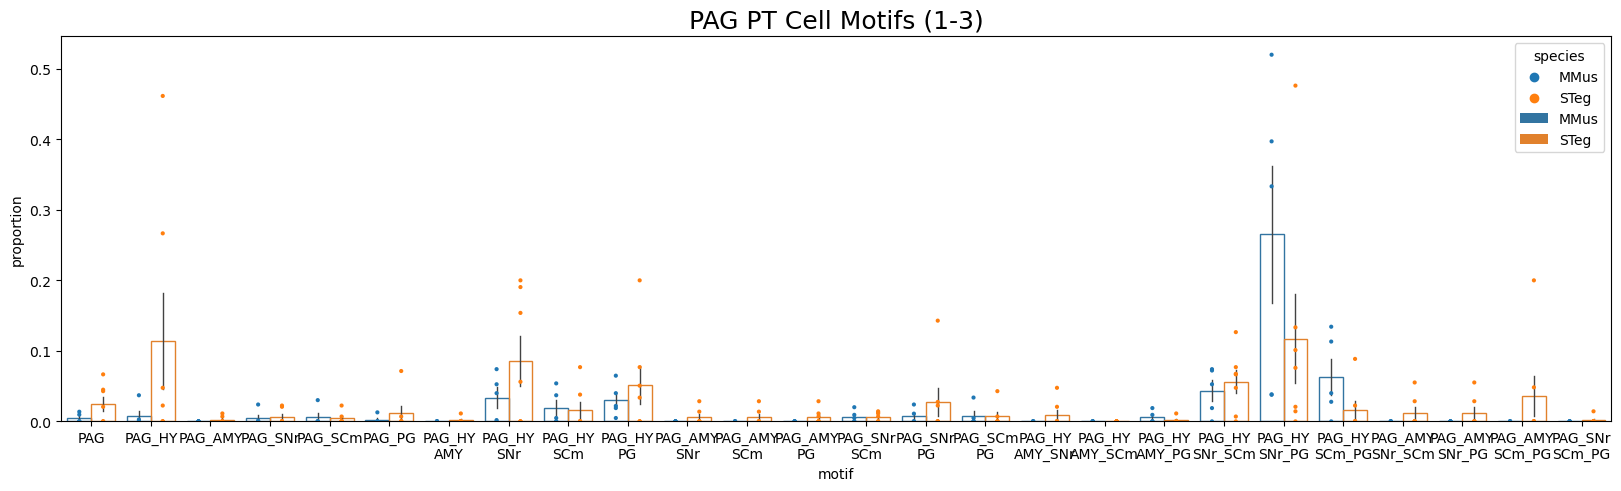

In [11]:
df_pt = [df[df["type"]=="PT"] for df in omc_type]
df_pag = [df[df["PAG"]==1] for df in df_pt]
df_list = [df.drop(['OMCi', 'OMCc', 'AUD', 'STR', 'TH', 'BS', 'type'], axis=1) for df in df_pag]
plot_df = pd.DataFrame(columns=["motif", "proportion", "count", "total", "mice", "species", "dataset"])


for i in range(len(df_list)):
    df = df_list[i]
    total = df.shape[0]

    # degree 1
    idx1 = df.sum(axis=1) == 1
    df_1 = df[idx1]
    pag = (df_1["PAG"]==1).sum()
    # hy = (df_1["HY"]==1).sum()
    # amy = (df_1["AMY"]==1).sum()
    # snr = (df_1["SNr"]==1).sum()
    # scm = (df_1["SCm"]==1).sum()
    # pg = (df_1["PG"]==1).sum()
    int_df = pd.DataFrame({'motif':["PAG"], 
                           'proportion':[pag/total],
                      'count':[pag], 'total':total, 'mice':mice[i], 
                      'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])

    # degree 2
    idx2 = df.sum(axis=1) == 2
    df_2 = df[idx2]
    pag_hy = ((df_2["PAG"]==1) & df_2["HY"]==1).sum()
    pag_amy = ((df_2["PAG"]==1) & df_2["AMY"]==1).sum()
    pag_snr = ((df_2["PAG"]==1) & df_2["SNr"]==1).sum()
    pag_scm = ((df_2["PAG"]==1) & df_2["SCm"]==1).sum()
    pag_pg = ((df_2["PAG"]==1) & df_2["PG"]==1).sum()
    int_df = pd.DataFrame({'motif':["PAG_HY", "PAG_AMY", "PAG_SNr", "PAG_SCm", "PAG_PG"], 
                           'proportion':[pag_hy/total, pag_amy/total,pag_snr/total, pag_scm/total, pag_pg/total],
                      'count':[pag_hy, pag_amy, pag_snr, pag_scm, pag_pg], 'total':total, 'mice':mice[i], 
                      'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])

    # degree 3
    idx3 = df.sum(axis=1) == 3
    df_3 = df[idx3]
    pag_hy_amy = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["AMY"]==1)).sum()
    pag_hy_snr = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["SNr"]==1)).sum()
    pag_hy_scm = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["SCm"]==1)).sum()
    pag_hy_pg = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["PG"]==1)).sum()
    pag_amy_snr = ((df_3["PAG"]==1) & (df_3["AMY"]==1) & (df_3["SNr"]==1)).sum()
    pag_amy_scm = ((df_3["PAG"]==1) & (df_3["AMY"]==1) & (df_3["SCm"]==1)).sum()
    pag_amy_pg = ((df_3["PAG"]==1) & (df_3["AMY"]==1) & (df_3["PG"]==1)).sum()
    pag_snr_scm = ((df_3["PAG"]==1) & (df_3["SNr"]==1) & (df_3["SCm"]==1)).sum()
    pag_snr_pg = ((df_3["PAG"]==1) & (df_3["SNr"]==1) & (df_3["PG"]==1)).sum()
    pag_scm_pg = ((df_3["PAG"]==1) & (df_3["SCm"]==1) & (df_3["PG"]==1)).sum()
    int_df = pd.DataFrame({'motif':["PAG_HY\nAMY", "PAG_HY\nSNr", "PAG_HY\nSCm", "PAG_HY\nPG",
                                    "PAG_AMY\nSNr", "PAG_AMY\nSCm", "PAG_AMY\nPG", 
                                    "PAG_SNr\nSCm", "PAG_SNr\nPG", "PAG_SCm\nPG"], 
                           'proportion':[pag_hy_amy/total, pag_hy_snr/total, pag_hy_scm/total, pag_hy_pg/total, 
                                         pag_amy_snr/total, pag_amy_snr/total, pag_amy_pg/total, 
                                         pag_snr_scm/total, pag_snr_pg/total, pag_scm_pg/total],
                            'count':[pag_hy_amy, pag_hy_snr, pag_hy_scm, pag_hy_pg, pag_amy_snr, 
                               pag_amy_scm, pag_amy_pg, pag_snr_scm, pag_snr_pg, pag_scm_pg],
                            'total':total, 'mice':mice[i], 
                            'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])

    # degree 4
    idx4 = df.sum(axis=1) == 4
    df_4 = df[idx4]
    pag_hy_amy_snr = ((df_4["PAG"]==1) & (df_4["HY"]==1) & (df_4["AMY"]==1) & (df_4["SNr"]==1)).sum()
    pag_hy_amy_scm = ((df_4["PAG"]==1) & (df_4["HY"]==1) & (df_4["AMY"]==1) & (df_4["SCm"]==1)).sum()
    pag_hy_amy_pg = ((df_4["PAG"]==1) & (df_4["HY"]==1) & (df_4["AMY"]==1) & (df_4["PG"]==1)).sum()
    pag_hy_snr_scm = ((df_4["PAG"]==1) & (df_4["HY"]==1) & (df_4["SNr"]==1) & (df_4["SCm"]==1)).sum()
    pag_hy_snr_pg = ((df_4["PAG"]==1) & (df_4["HY"]==1) & (df_4["SNr"]==1) & (df_4["PG"]==1)).sum()
    pag_hy_scm_pg = ((df_4["PAG"]==1) & (df_4["HY"]==1) & (df_4["SCm"]==1) & (df_4["PG"]==1)).sum()

    pag_amy_snr_scm = ((df_4["PAG"]==1) & (df_4["AMY"]==1) & (df_4["SNr"]==1) & (df_4["SCm"]==1)).sum()
    pag_amy_snr_pg = ((df_4["PAG"]==1) & (df_4["AMY"]==1) & (df_4["SNr"]==1) & (df_4["PG"]==1)).sum()
    pag_amy_scm_pg = ((df_4["PAG"]==1) & (df_4["AMY"]==1) & (df_4["SCm"]==1) & (df_4["PG"]==1)).sum()

    pag_snr_scm_pg = ((df_4["PAG"]==1) & (df_4["SNr"]==1) & (df_4["SCm"]==1) & (df_4["PG"]==1)).sum()

    int_df = pd.DataFrame({'motif':["PAG_HY\nAMY_SNr", "PAG_HY\nAMY_SCm", "PAG_HY\nAMY_PG", "PAG_HY\nSNr_SCm", "PAG_HY\nSNr_PG", "PAG_HY\nSCm_PG",
                                    "PAG_AMY\nSNr_SCm", "PAG_AMY\nSNr_PG", "PAG_AMY\nSCm_PG", 
                                    "PAG_SNr\nSCm_PG"], 
                           'proportion':[pag_hy_amy_snr/total, pag_hy_amy_scm/total, pag_hy_amy_pg/total, pag_hy_snr_scm/total, 
                                         pag_hy_snr_pg/total, pag_hy_scm_pg/total, pag_amy_snr_scm/total, 
                                         pag_amy_snr_scm/total, pag_amy_snr_pg/total, pag_amy_scm_pg/total],
                            'count':[pag_hy_amy_snr, pag_hy_amy_scm, pag_hy_amy_pg, pag_hy_snr_scm, pag_hy_snr_pg, 
                               pag_hy_scm_pg, pag_amy_snr_scm, pag_amy_snr_pg, pag_amy_scm_pg, pag_snr_scm_pg],
                            'total':total, 'mice':mice[i], 
                            'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])


# dot bar plot
plt.figure(figsize=(20,5))
dot_bar_plot(plot_df, title="PAG PT Cell Motifs (1-3)", xaxis="motif", yaxis="proportion", hueaxis="species")
plt.show()



# upset plot

https://upsetplot.readthedocs.io/en/stable/

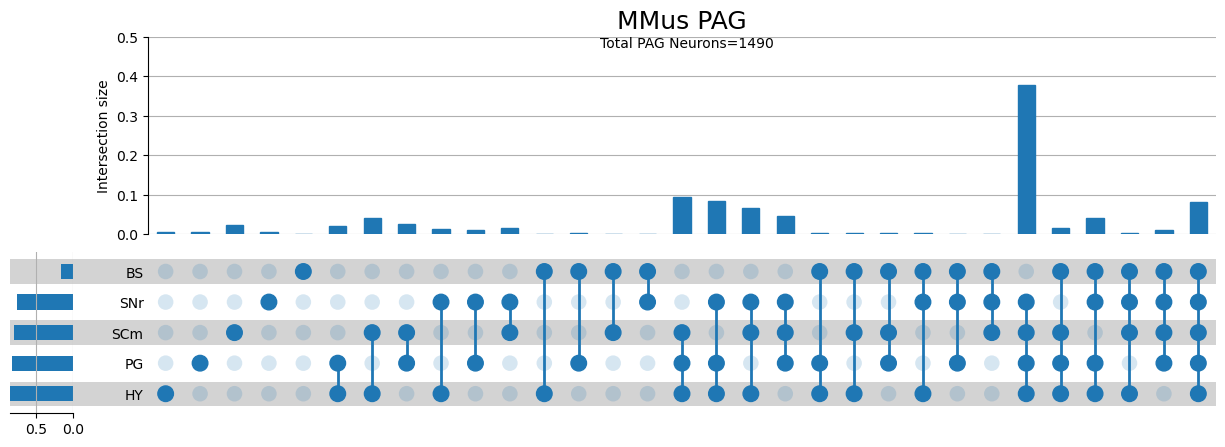

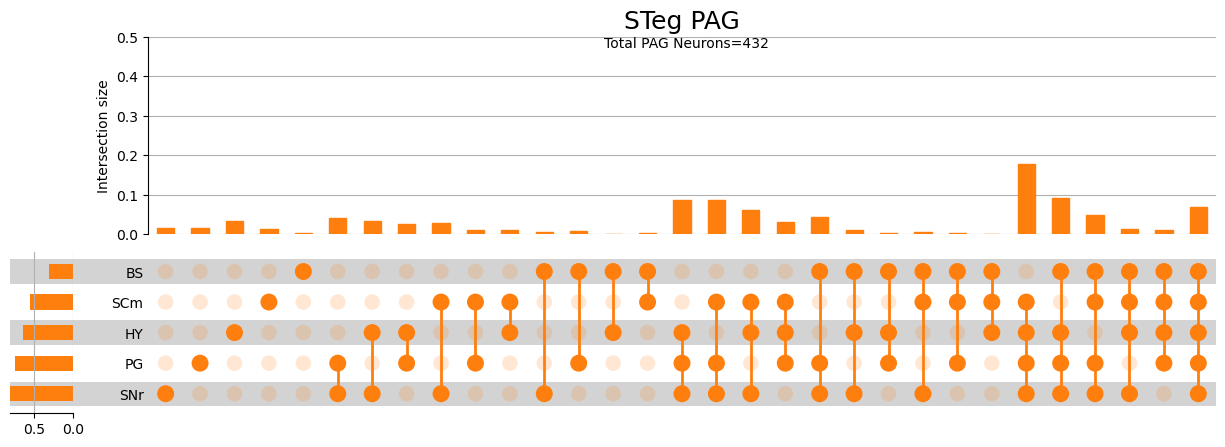

In [164]:
pag_areas = ["HY", "SNr", "SCm", "PG", "BS"]
plot = df_to_motif_proportion(mm_pag, areas=pag_areas, proportion=True)
upset_plot(plot, title="MMus PAG", suptitle="Total PAG Neurons="+str(mm_pag.shape[0]))
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()

plot = df_to_motif_proportion(st_pag, areas=pag_areas, proportion=True)
# plt.suptitle("Total PAG Neurons="+str(st_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
upset_plot(plot, title="STeg PAG", suptitle="Total PAG Neurons="+str(st_pag.shape[0]), facecolor="tab:orange")
plt.show()

In [110]:
# pd.set_option("display.max_rows", None)
# display(plot_df)
# pd.set_option("display.max_rows", 10)


# PAG subdivisions

In [169]:
# load data w/ separated areas
#### load data
with open(in_path +'M194_M220_OMC_separate_bin4.pkl', 'rb') as f:
    omc_sep = pickle.load(f)   

# #### load data
# with open(in_path +'M194_M220_OMC_separate_countN4.pkl', 'rb') as f:
#     omc_countN = pickle.load(f)
sep_clean = [clean_up_data(df) for df in omc_sep]
sep_type = [sort_by_celltype(df, it_areas=["OMCc", "AUD", "STRd", "STRv"],
                             pt_areas=["AMY", "SNr", "SCm", "PG", "APAGd","APAGv", "PPAGd", "PPAGv", "BS"])
                            for df in sep_clean]
sep_type[0]

,OMCi,OMCc,AUD,STRd,STRv,TH,HY,AMY,SNr,SCm,PG,APAGd,APAGv,PPAGd,PPAGv,BS,type
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11730,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,PT
11731,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,PT
11732,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,PT
11733,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,PT


In [171]:
sep_pag = []
for i in range(num_samples):
    df = sep_type[i]
    apagd = df[df['APAGd']==1]
    apagv = df[df['APAGv']==1]
    ppagd = df[df['PPAGd']==1]
    ppagv = df[df['PPAGv']==1]
    sep_pag.append(pd.concat([apagd, apagv, ppagd, ppagv]))



,OMCi,OMCc,AUD,STRd,STRv,TH,HY,AMY,SNr,SCm,PG,APAGd,APAGv,PPAGd,PPAGv,BS,type
10935,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,PT
11334,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,PT
11384,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,PT
11463,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,PT
10634,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,PT
10651,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,PT
10763,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,PT
10768,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,PT
10769,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,PT
10788,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,PT


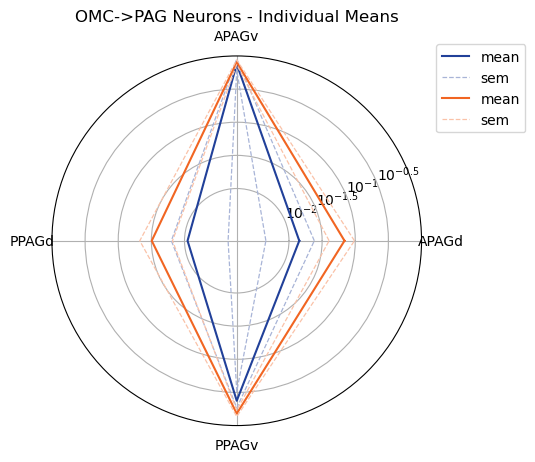

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

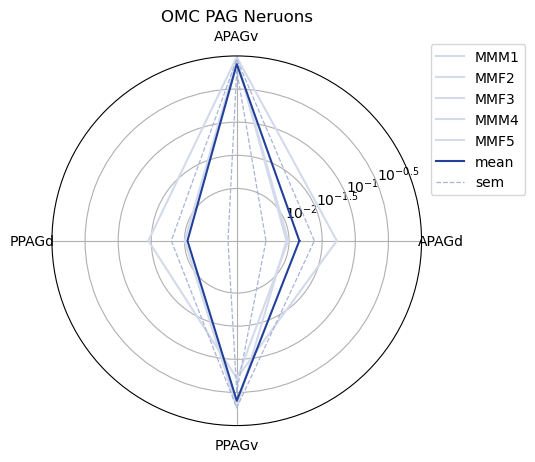

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

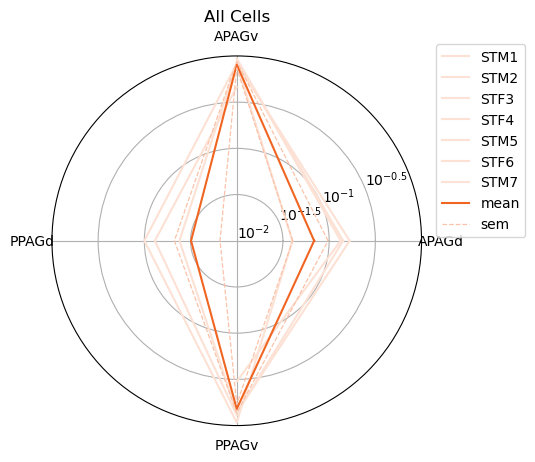

In [233]:
proportion_polar_plot(sep_pag, title="OMC->PAG Neurons - Individual Means", 
                      keep=["APAGd", "APAGv", "PPAGd", "PPAGv"], 
                      log_norm=True)
plt.show()

pag_mm = [sep_pag[i] for i in range(len(sep_pag)) if species[i]=="MMus"]
meta_mm = metadata[metadata["species"]=="MMus"].reset_index(drop=True)

proportion_polar_plot(pag_mm, title="OMC PAG Neruons", 
                      keep=["APAGd", "APAGv", "PPAGd", "PPAGv"],
                      plot_individuals=True, meta=meta_mm)
plt.show()

pag_st = [sep_pag[i] for i in range(len(sep_pag)) if species[i]=="STeg"]
meta_st = metadata[metadata["species"]=="STeg"].reset_index(drop=True)

proportion_polar_plot(pag_st, title="All Cells", 
                      keep=["APAGd", "APAGv", "PPAGd", "PPAGv"],
                      plot_individuals=True, meta=meta_st)
plt.show()

In [228]:
pag_mm_concat = pd.concat(pag_mm)
pag_st_concat = pd.concat(pag_st)

meta1 = {"mice":["ALL"], "species":["MMus"], "dataset":["ALL"]}
meta2 = {"mice":["ALL"], "species":["STeg"], "dataset":["ALL"]}

mm_pag_prop = dfs_to_proportions([pag_mm_concat], meta=meta1, keep=["APAGd", "APAGv", "PPAGd", "PPAGv"])

st_pag_prop = dfs_to_proportions([pag_st_concat], meta=meta2, keep=["APAGd", "APAGv", "PPAGd", "PPAGv"])
mm_pag_prop
# meta = pd.concat([pd.DataFrame(meta1), pd.DataFrame(meta2)])

# pag_prop = dfs_to_proportions([pag_mm_concat, pag_st_concat], meta=[meta1,meta2], keep=["APAGd", "APAGv", "PPAGd", "PPAGv"])
# pag_prop

,area,proportion,mice,species,dataset
0,APAGd,0.009959,ALL,MMus,ALL
1,APAGv,0.861746,ALL,MMus,ALL
2,PPAGd,0.008787,ALL,MMus,ALL
3,PPAGv,0.474517,ALL,MMus,ALL


Text(0.5, 1.0, 'OMC -> PAG Neurons - Overall Proportions')

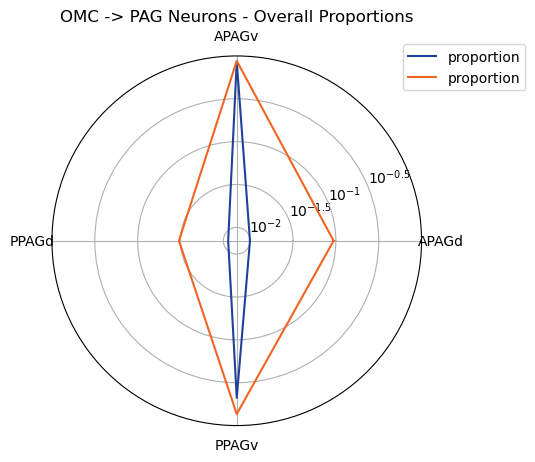

In [232]:

mm_pag_prop = dfs_to_proportions([pag_mm_concat], meta=meta1, keep=["APAGd", "APAGv", "PPAGd", "PPAGv"])

st_pag_prop = dfs_to_proportions([pag_st_concat], meta=meta2, keep=["APAGd", "APAGv", "PPAGd", "PPAGv"])

log_norm=True
title="OMC -> PAG Neurons - Overall Proportions"
# # set-up angles used to plot
N = 4 # number of areas to plot
angles = [n / float(N) * 2 * np.pi for n in range(N)] # in radians
angles.append(2*np.pi) # extra angle ensures connected circle

sp_list = ["MMus", "STeg"] # list of species in data

fig = plt.subplot(projection='polar')

for sp in sp_list:

    if sp=="MMus":
        sp_cmp = blue_cmp
        plot_df = mm_pag_prop
    elif sp=="STeg":
        sp_cmp = orange_cmp
        plot_df = st_pag_prop

    prop = plot_df['proportion']
    prop.loc[len(prop)+1] = prop.loc[0]

    # put proportions on log scale
    if log_norm:
        prop = np.log10(prop)

    plt.polar(angles, prop, color=sp_cmp.colors[255], label = 'proportion')

plt.xticks(angles[:-1], plot_df.area.unique())
if log_norm:
    plt.yticks([-2,-1.5,-1,-0.5],['$10^{-2}$','$10^{-1.5}$','$10^{-1}$','$10^{-0.5}$'])
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.title(title)

## ACA

In [235]:
# load data w/ separated areas
#### load data
with open(in_path +'M194_M220_ACA_separate_bin4.pkl', 'rb') as f:
    acc_sep = pickle.load(f)   


sep_clean = [clean_up_data(df, to_drop=["OB", "OMCi", "OMCc", "HIP"], inj_site="ACAi") for df in acc_sep]
sep_type = [sort_by_celltype(df, it_areas=["ACAc", "AUD", "STRd", "STRv"],
                             pt_areas=["AMY", "SNr", "SCm", "PG", "APAGd","APAGv", "PPAGd", "PPAGv", "BS"])
                            for df in sep_clean]
sep_type[0]

,ACAi,ACAc,AUD,STRd,STRv,TH,HY,AMY,SNr,SCm,PG,APAGd,APAGv,PPAGd,PPAGv,BS,type
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,PT
8517,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,PT
8518,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,PT
8519,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,PT


In [236]:
sep_pag = []
for i in range(num_samples):
    df = sep_type[i]
    apagd = df[df['APAGd']==1]
    apagv = df[df['APAGv']==1]
    ppagd = df[df['PPAGd']==1]
    ppagv = df[df['PPAGv']==1]
    sep_pag.append(pd.concat([apagd, apagv, ppagd, ppagv]))



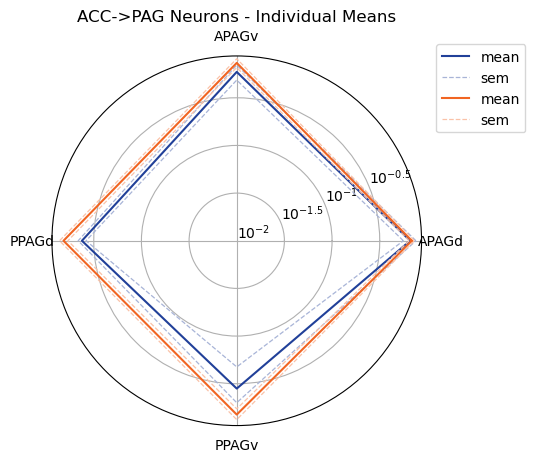

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(valu

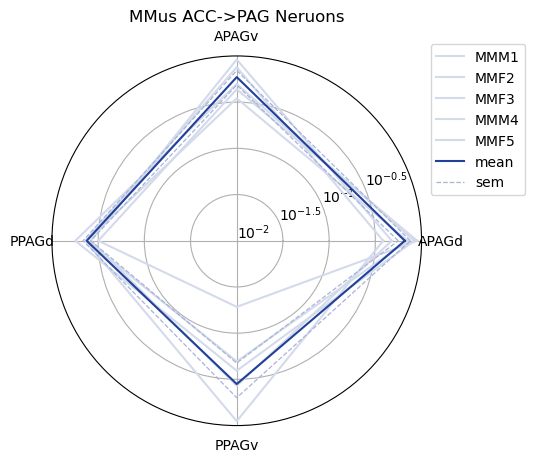

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(valu

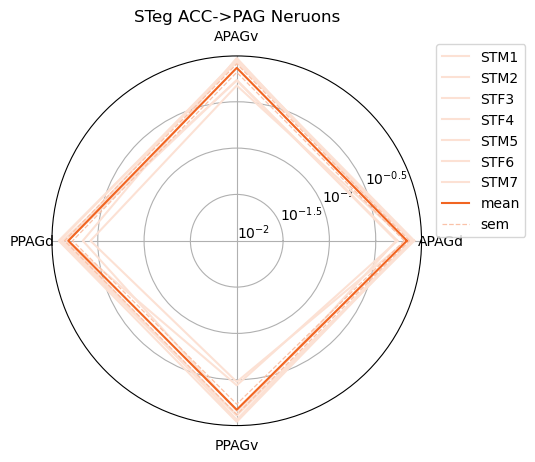

In [237]:
proportion_polar_plot(sep_pag, title="ACC->PAG Neurons - Individual Means", 
                      keep=["APAGd", "APAGv", "PPAGd", "PPAGv"], 
                      log_norm=True)
plt.show()

pag_mm = [sep_pag[i] for i in range(len(sep_pag)) if species[i]=="MMus"]
meta_mm = metadata[metadata["species"]=="MMus"].reset_index(drop=True)

proportion_polar_plot(pag_mm, title="MMus ACC->PAG Neruons", 
                      keep=["APAGd", "APAGv", "PPAGd", "PPAGv"],
                      plot_individuals=True, meta=meta_mm)
plt.show()

pag_st = [sep_pag[i] for i in range(len(sep_pag)) if species[i]=="STeg"]
meta_st = metadata[metadata["species"]=="STeg"].reset_index(drop=True)

proportion_polar_plot(pag_st, title="STeg ACC->PAG Neruons", 
                      keep=["APAGd", "APAGv", "PPAGd", "PPAGv"],
                      plot_individuals=True, meta=meta_st)
plt.show()

In [238]:
pag_mm_concat = pd.concat(pag_mm)
pag_st_concat = pd.concat(pag_st)

meta1 = {"mice":["ALL"], "species":["MMus"], "dataset":["ALL"]}
meta2 = {"mice":["ALL"], "species":["STeg"], "dataset":["ALL"]}

mm_pag_prop = dfs_to_proportions([pag_mm_concat], meta=meta1, keep=["APAGd", "APAGv", "PPAGd", "PPAGv"])

st_pag_prop = dfs_to_proportions([pag_st_concat], meta=meta2, keep=["APAGd", "APAGv", "PPAGd", "PPAGv"])
mm_pag_prop
# meta = pd.concat([pd.DataFrame(meta1), pd.DataFrame(meta2)])

# pag_prop = dfs_to_proportions([pag_mm_concat, pag_st_concat], meta=[meta1,meta2], keep=["APAGd", "APAGv", "PPAGd", "PPAGv"])
# pag_prop

,area,proportion,mice,species,dataset
0,APAGd,0.620832,ALL,MMus,ALL
1,APAGv,0.622779,ALL,MMus,ALL
2,PPAGd,0.431005,ALL,MMus,ALL
3,PPAGv,0.489981,ALL,MMus,ALL


Text(0.5, 1.0, 'ACC->PAG Neurons - Overall Proportions')

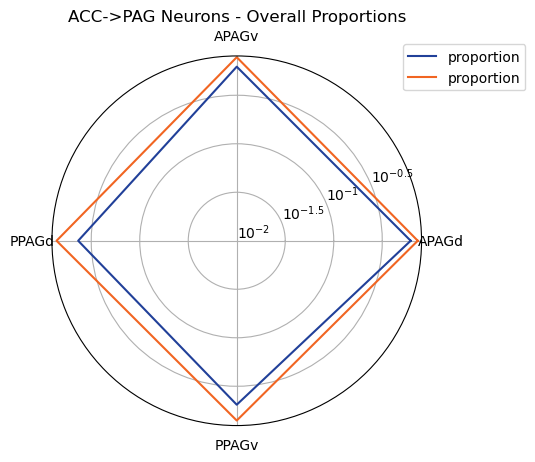

In [240]:

mm_pag_prop = dfs_to_proportions([pag_mm_concat], meta=meta1, keep=["APAGd", "APAGv", "PPAGd", "PPAGv"])

st_pag_prop = dfs_to_proportions([pag_st_concat], meta=meta2, keep=["APAGd", "APAGv", "PPAGd", "PPAGv"])

log_norm=True
title="ACC->PAG Neurons - Overall Proportions"
# # set-up angles used to plot
N = 4 # number of areas to plot
angles = [n / float(N) * 2 * np.pi for n in range(N)] # in radians
angles.append(2*np.pi) # extra angle ensures connected circle

sp_list = ["MMus", "STeg"] # list of species in data

fig = plt.subplot(projection='polar')

for sp in sp_list:

    if sp=="MMus":
        sp_cmp = blue_cmp
        plot_df = mm_pag_prop
    elif sp=="STeg":
        sp_cmp = orange_cmp
        plot_df = st_pag_prop

    prop = plot_df['proportion']
    prop.loc[len(prop)+1] = prop.loc[0]

    # put proportions on log scale
    if log_norm:
        prop = np.log10(prop)

    plt.polar(angles, prop, color=sp_cmp.colors[255], label = 'proportion')

plt.xticks(angles[:-1], plot_df.area.unique())
if log_norm:
    plt.yticks([-2,-1.5,-1,-0.5],['$10^{-2}$','$10^{-1.5}$','$10^{-1}$','$10^{-0.5}$'])
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.title(title)